### 붓꽃 품종 분류

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

# 데이터 준비
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df["target"] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# 데이터 전처리
X = df.drop('target', axis=1)
y = df['target']

X.shape, y.shape

((150, 4), (150,))

### 피처 스케일링 (Feature Scaling)

In [4]:
# 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [5]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

### Clustering (군집 분석) / 비지도 학습

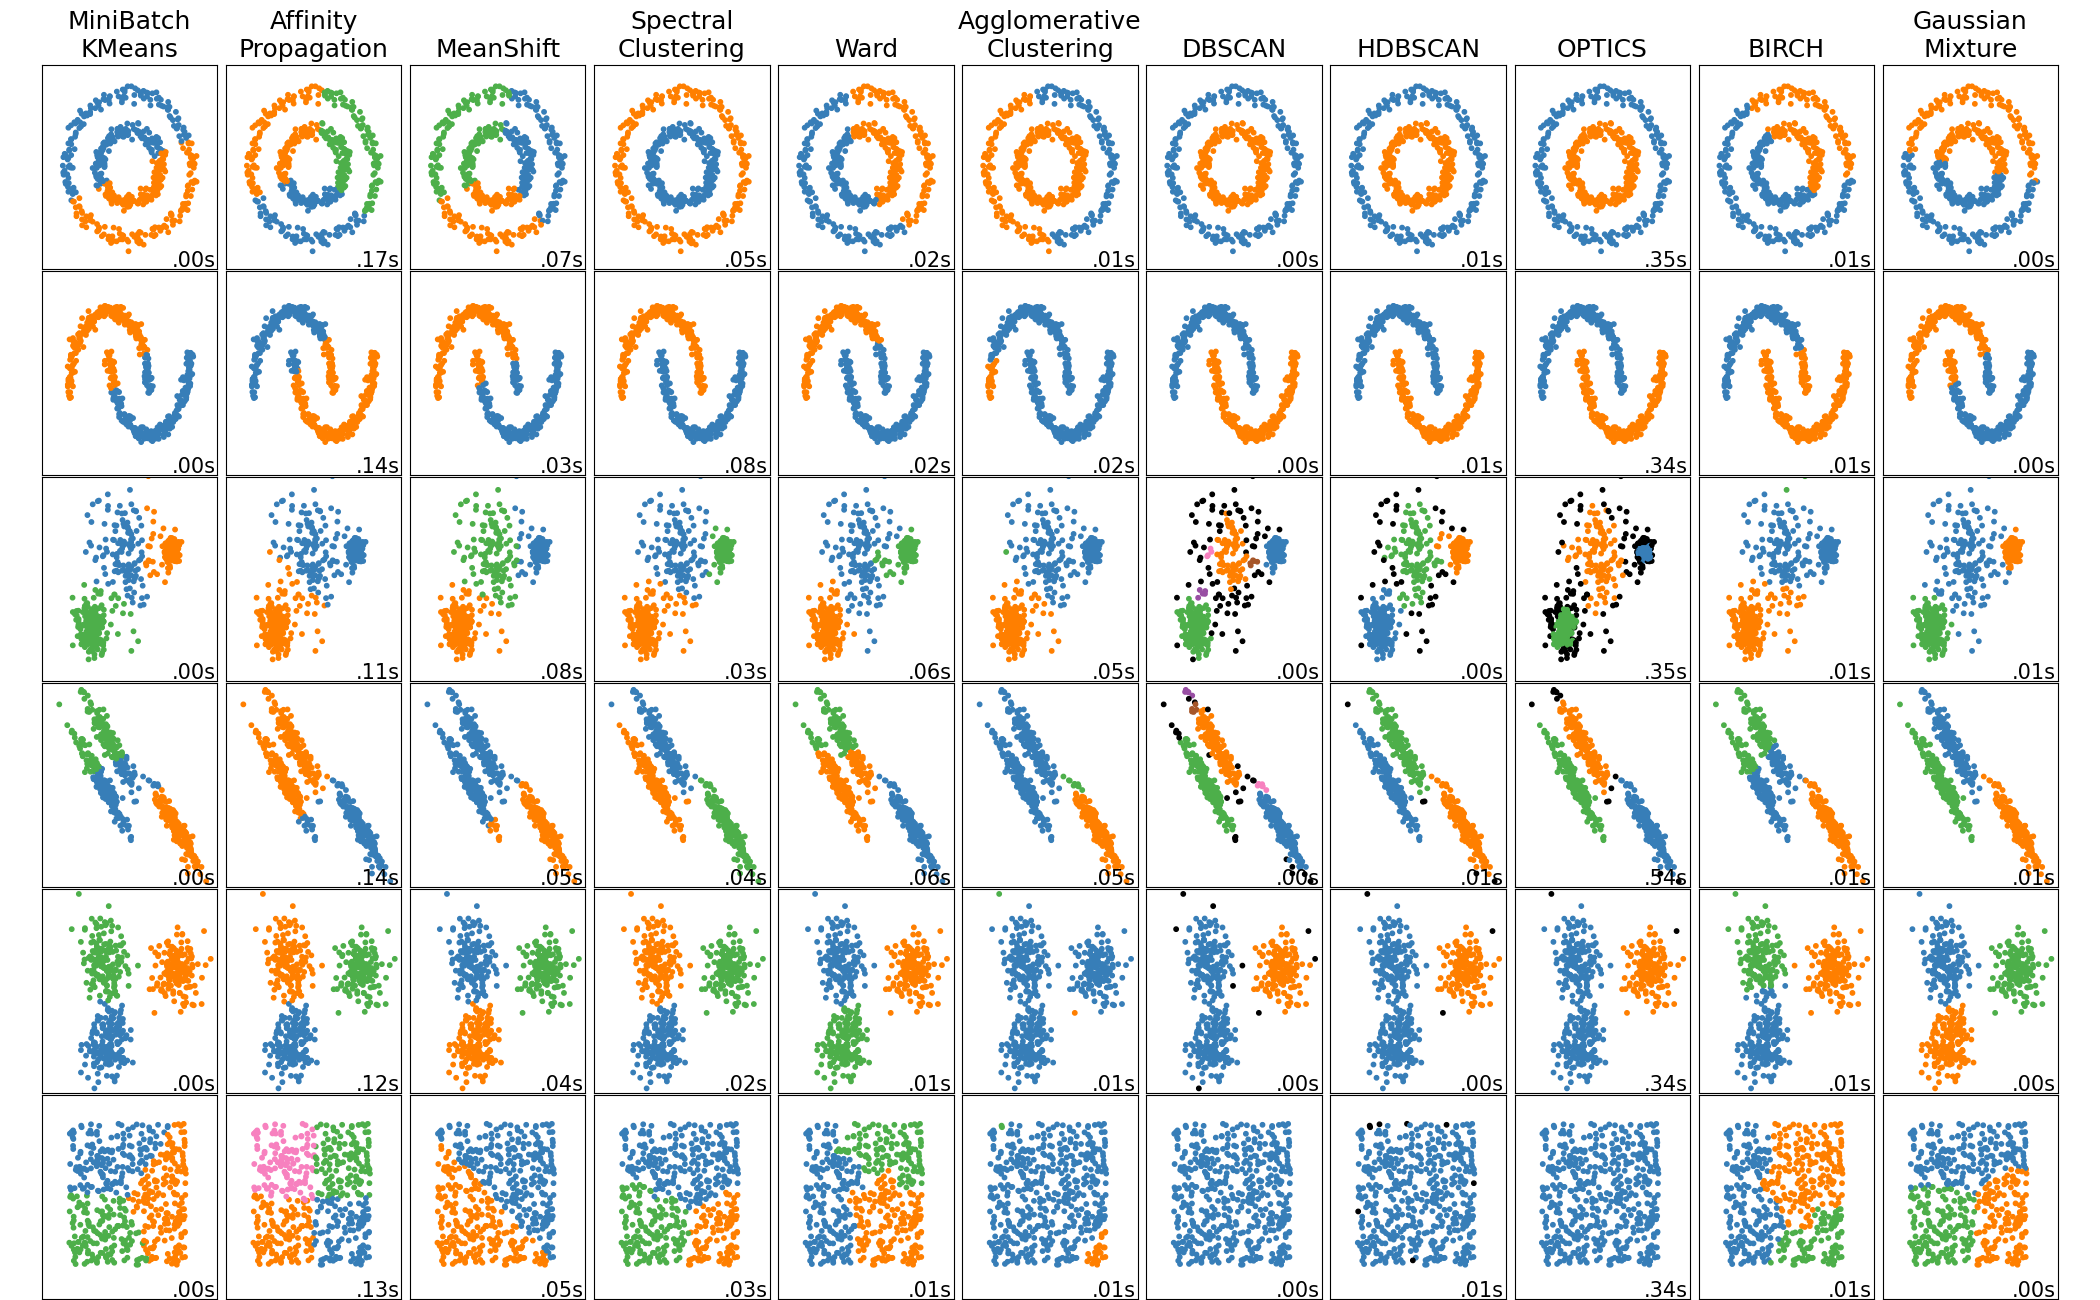

In [6]:
# 군집화가 잘됐는지의 지표 : 군집간의 거리 / 군집 내부의 거리 (군집간의 거리가 클수록 좋다.)

In [7]:
# target 변수 제외 
X_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


### 군집 분석

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

### K-Means

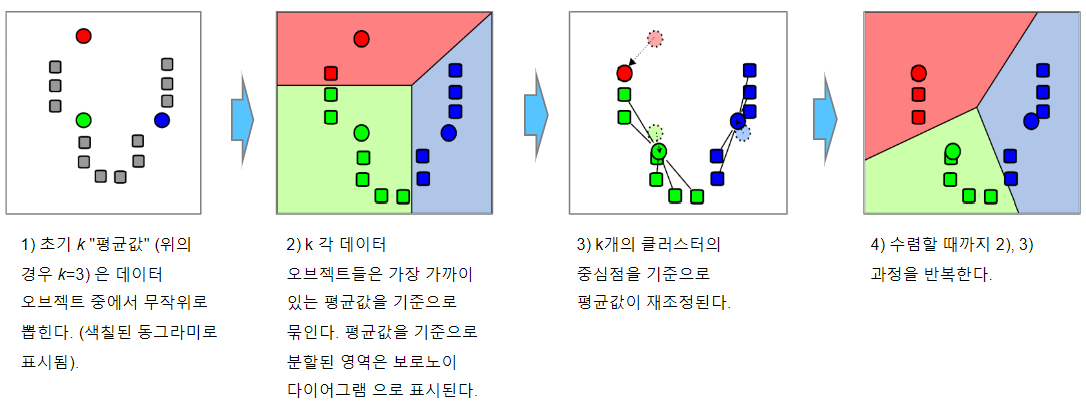

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=3) # k-means++ : 확률 기반 알고리즘
kmeans.fit(X_scaled)   

In [10]:
clusters = kmeans.labels_  # 0, 1, 2 클래스의 샘플들
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# 새로운 샘플이 들어오는 경우엔 예측을 해야한다.
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2])

In [12]:
df['cluster'] = clusters
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [13]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [14]:
df['cluster'].value_counts()

cluster
2    52
1    50
0    48
Name: count, dtype: int64

### 군집 분석 결과와 품종 비교

In [15]:
df.loc[df['cluster']==0, 'target'].value_counts()

target
1    40
2     8
Name: count, dtype: int64

In [16]:
df.loc[df['cluster']==1, 'target'].value_counts()

target
0    50
Name: count, dtype: int64

In [17]:
df.loc[df['cluster']==2, 'target'].value_counts()

target
2    42
1    10
Name: count, dtype: int64

### 군집 분석 시각화

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

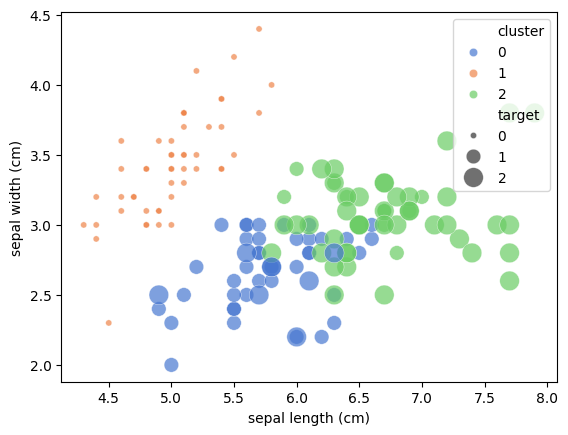

In [18]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster', 
                size='target', sizes=(20, 200), 
                alpha=0.7, palette="muted", data=df)

### Hierarchical Clustering (계층적 군집화)

- 각 데이터 포인트를 독립적인 군집으로 간주하고 가장 가까운 두 군집을 합친다.

- 최종적으로 하나의 군집으로 결합되면 종료한다. 아래 그림과 같은 트리 형태를 덴드로그램(Dendrogram) 이라 한다.

- 각 데이터 포인트간의 거리를 전부 계산해야 하기에 큰 데이터셋에 비효율적이고, 이상치에 민감하다.

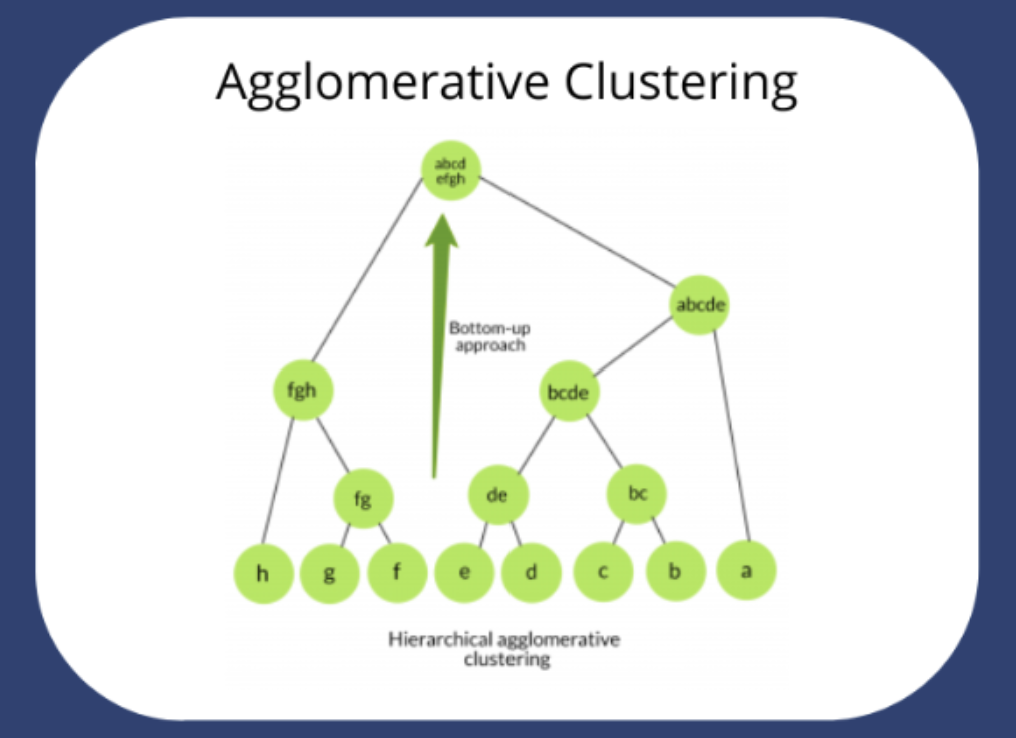

In [19]:
aggcluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
# distance_threshold : 기준이 되는 거리 설정, 0이라는 것은 가장 작은 군집들을 다 찾겠다.
aggcluster.fit(X_scaled)   

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

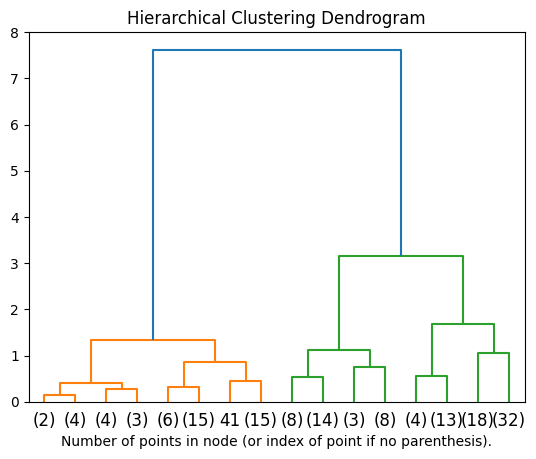

In [20]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
# 덴드로그램 시각화
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)


plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(aggcluster, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [21]:
aggcluster = AgglomerativeClustering(distance_threshold=2, n_clusters=None)
aggcluster.fit(X_scaled)   

AgglomerativeClustering(distance_threshold=2, n_clusters=None)

In [22]:
clusters = aggcluster.labels_  
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [23]:
df['cluster'] = clusters
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [24]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [25]:
df['cluster'].value_counts()

cluster
0    67
1    50
2    33
Name: count, dtype: int64

### 군집 분석 결과와 품종 비교

In [26]:
df.loc[df['cluster']==0, 'target'].value_counts()

target
1    50
2    17
Name: count, dtype: int64

In [27]:
df.loc[df['cluster']==1, 'target'].value_counts()

target
0    50
Name: count, dtype: int64

In [28]:
df.loc[df['cluster']==2, 'target'].value_counts()

target
2    33
Name: count, dtype: int64

### 군집 분석 시각화

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

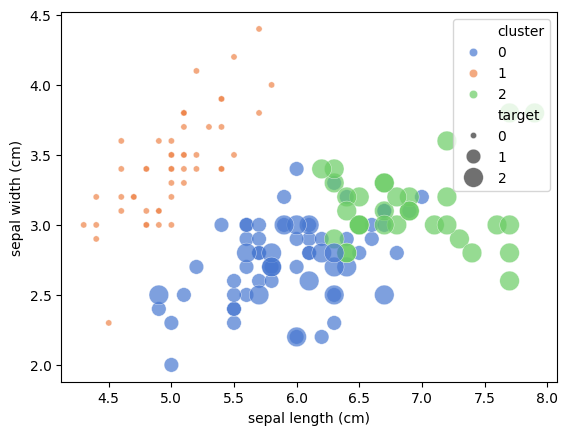

In [29]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster', 
                size='target', sizes=(20, 200), 
                alpha=0.7, palette="muted", data=df)

### DBSCAN

- K-Means 와 달리 군집의 개수를 사전에 정하지 않고, 밀집되어 있는 부분을 군집이라고 판단하며 떨어져 있으면 노이즈(이상치) 라 판단한다.

- 따라서 반경(eps) 와 최소 포인트 수(min_samples) 를 적절하게 설정하는 것이 중요하다.

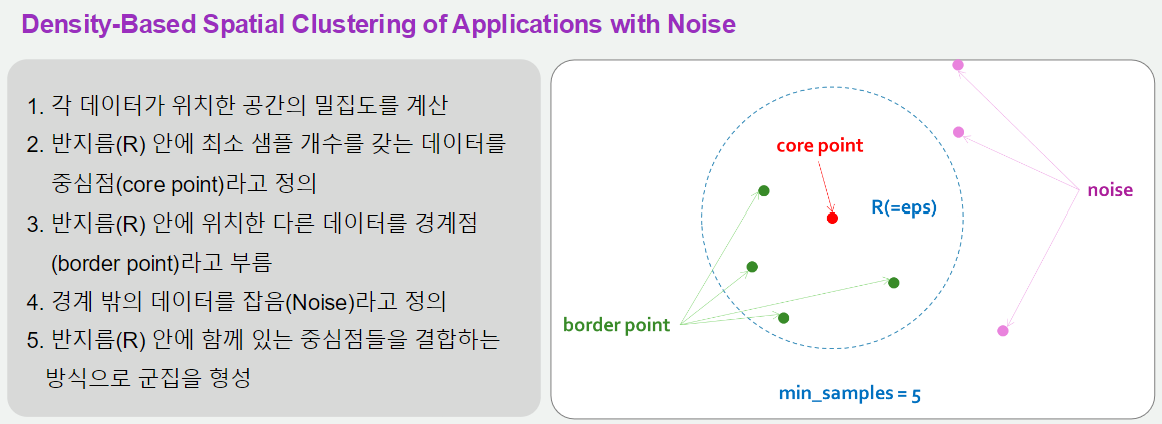

In [30]:
dbscan = DBSCAN(eps=0.15, min_samples=5) # eps(R: 반지름)
dbscan.fit(X_scaled)

DBSCAN(eps=0.15)

In [31]:
clusters = dbscan.labels_  
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [32]:
df['cluster'] = clusters
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [33]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [34]:
df['cluster'].value_counts()
# -1 은 중심점, 경계점이 아닌 노이즈 (noise)

cluster
 1    81
 0    47
-1    22
Name: count, dtype: int64

### 군집 분석 결과와 품종 비교

In [35]:
df.loc[df['cluster']==-1, 'target'].value_counts()

target
2    14
1     5
0     3
Name: count, dtype: int64

In [36]:
df.loc[df['cluster']==1, 'target'].value_counts()

target
1    45
2    36
Name: count, dtype: int64

In [37]:
df.loc[df['cluster']==0, 'target'].value_counts()

target
0    47
Name: count, dtype: int64

### 군집 분석 시각화

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

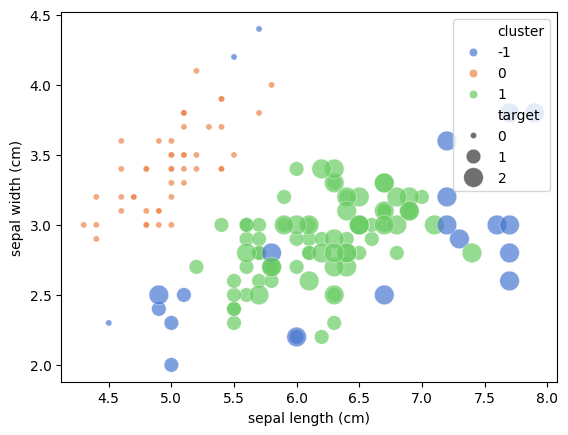

In [38]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster', 
                size='target', sizes=(20, 200), 
                alpha=0.7, palette="muted", data=df)

### GMM (Gaussian Mixture Model)

- 데이터를 여러 개의 가우시안 분포가 혼합된 형태로 모델링한다. 각 데이터 포인트는 여러 가우시안 분포 중 하나에서 생성된 것이라 본다.

- 혼합 가중치 : 각 가우시안 분포는 데이터에서 차지하는 비율을 나타내는 가중치가 있으며 각 가중치의 합은 1이다.

- EM 알고리즘 : GMM 은 매개변수를 학습하기 위해 EM 알고리즘을 사용한다.

    1. E-Step(Expectation) : 현재 모델을 사용하여 각 데이터 포인트가 각 가우시안 분포에서 발생할 확률을 계산한다.

    2. M-Step(Maximization) : 위의 확률을 사용하여 가우시안 분포의 파라미터(평균, 공분산, 혼합 가중치)를 최대화한다.

- 예를 들어, 아래 그림과 같이 데이터 포인트 x 는 파란색 분포를 따르고, y 는 주황색 분포를 따른다고 볼 수 있다.

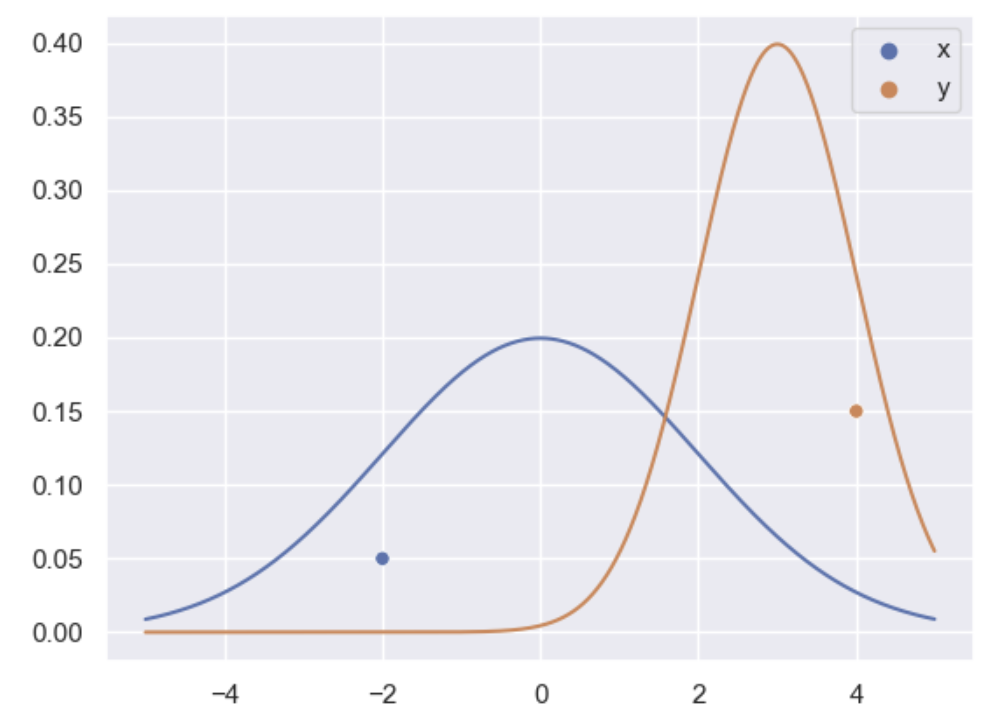

In [39]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=0)
gm.fit(X_scaled)

GaussianMixture(n_components=3, random_state=0)

In [40]:
df['cluster'] = gm.predict(X_scaled)
gm.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

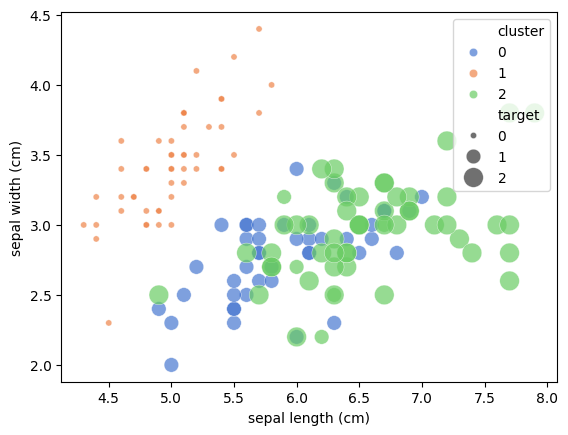

In [41]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster', 
                size='target', sizes=(20, 200), 
                alpha=0.7, palette="muted", data=df)

In [42]:
gm.predict_proba(X_scaled) # 각 cluster일 확률

array([[6.68366845e-044, 1.00000000e+000, 7.65053154e-035],
       [6.89049931e-031, 1.00000000e+000, 3.05010674e-028],
       [7.25217353e-036, 1.00000000e+000, 4.93744706e-030],
       [1.16396570e-031, 1.00000000e+000, 3.11587935e-026],
       [2.42897143e-046, 1.00000000e+000, 3.19529898e-035],
       [6.26230962e-045, 1.00000000e+000, 3.96976878e-035],
       [6.62821192e-036, 1.00000000e+000, 7.22801389e-029],
       [4.46148445e-040, 1.00000000e+000, 7.35591361e-032],
       [1.75823971e-027, 1.00000000e+000, 3.12363281e-024],
       [1.53351852e-035, 1.00000000e+000, 1.10794381e-028],
       [2.65460089e-049, 1.00000000e+000, 7.49879455e-038],
       [1.41580158e-038, 1.00000000e+000, 3.50706084e-029],
       [9.31893762e-034, 1.00000000e+000, 2.43505516e-028],
       [3.54240002e-034, 1.00000000e+000, 8.58795336e-028],
       [2.84607980e-062, 1.00000000e+000, 4.99331065e-048],
       [1.69615116e-063, 1.00000000e+000, 1.76915641e-046],
       [3.05905801e-049, 1.00000000e+000

In [43]:
gm.means_ # 각 cluster의 각각의 변수의 평균값

array([[0.4490692 , 0.32417934, 0.5431763 , 0.49925811],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.62393654, 0.39555114, 0.75983572, 0.78619009]])

### 차원의 저주

- 차원(특성 또는 변수의 개수)가 늘어나면 데이터의 밀도가 급격하게 감소한다.

- 모델의 성능은 차원이 늘면 일반적으로 향상되지만, 일정 수준 이상 커지게 될 경우 급격하게 모델의 성능이 나빠지는 현상을 보인다.

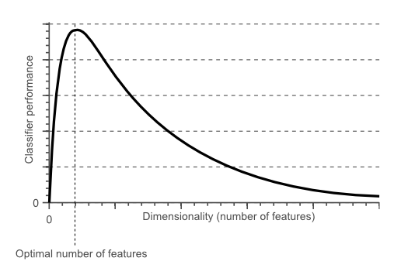

### PCA (주성분 분석)

- 위에서 언급한 차원의 저주를 해결하기 위해서 모델에 사용될 데이터의 특성을 줄여줘야 하는데, 그 방법으로 사용된다.

- 데이터에서 가장 크게 영향을 주는 변수를 찾기 위해 차원 축소를 한다. 데이터의 일부가 사라질 수 있지만, 주요한 요소는 남겨지게 된다.

- 오차와 노이즈(잡음)이 사라질 수 있다는 장점이 있다.

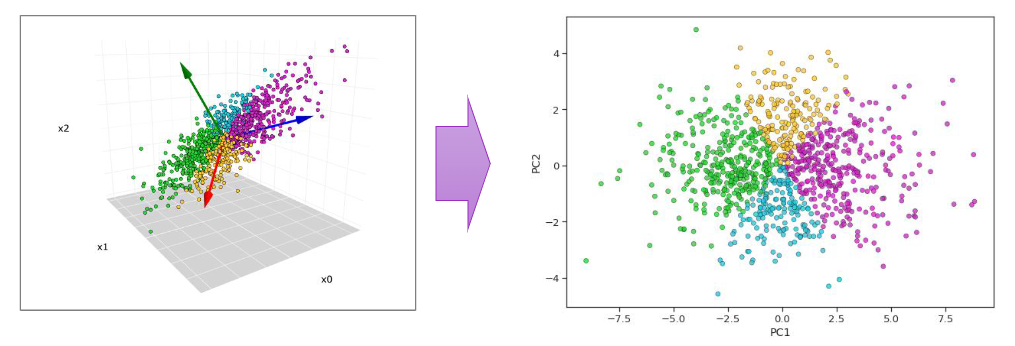

In [44]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
X.shape

(150, 4)

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 4차원(4개의 변수)를 2차원(2개의 변수)로 축소시키겠다.
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

In [47]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']
df_pca.head()

,PC1,PC2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

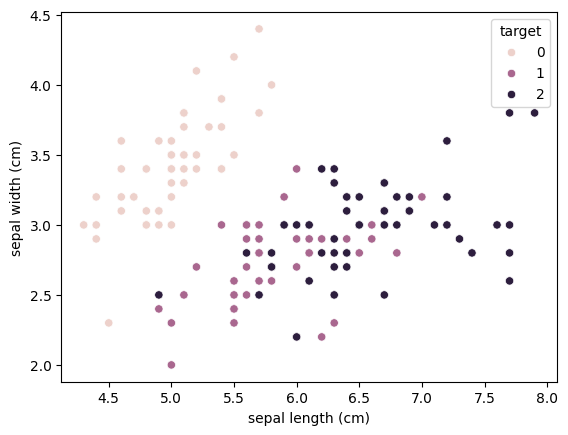

In [48]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df)

<Axes: xlabel='PC1', ylabel='PC2'>

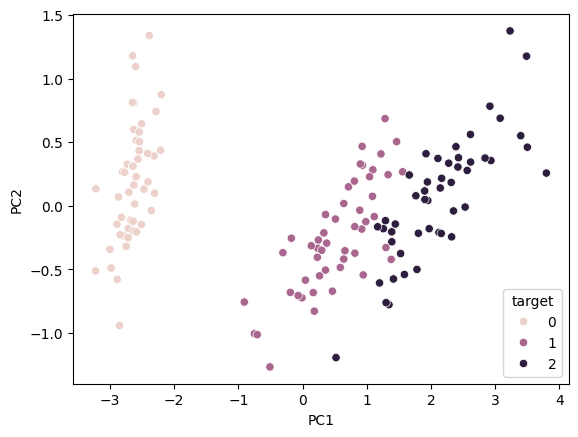

In [49]:
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca)

In [50]:
pca.components_.shape

(2, 4)

In [51]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [52]:
pca.explained_variance_

array([4.22824171, 0.24267075])

Text(0, 0.5, 'Variance')

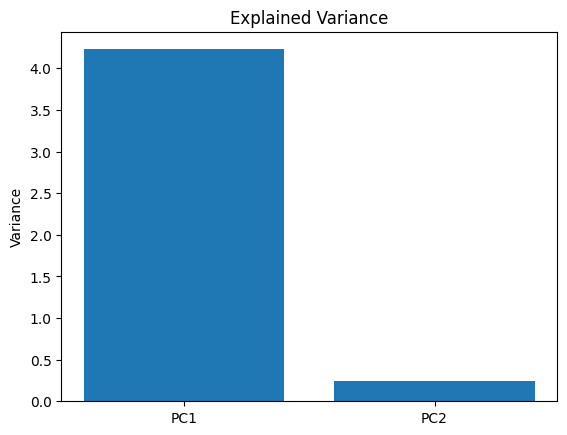

In [53]:
features = df_pca.columns[:-1]
plt.bar(features,  pca.explained_variance_)
plt.xticks(features)
plt.title("Explained Variance")
plt.ylabel("Variance")

In [54]:
pca = PCA(n_components = 3)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(150, 3)

In [55]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['target'] = df['target']
df_pca.head()

,PC1,PC2,PC3,target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


Text(0, 0.5, 'Variance')

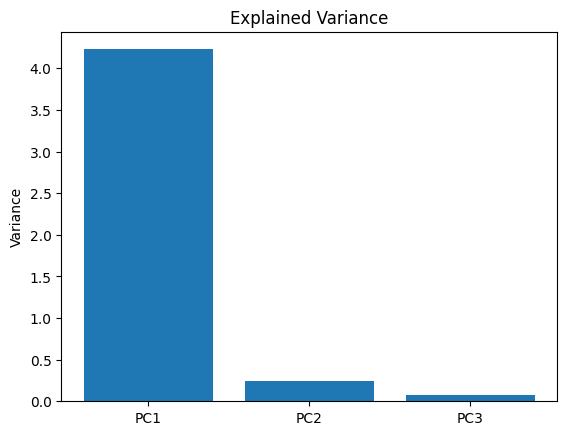

In [56]:
features = df_pca.columns[:-1]
plt.bar(features,  pca.explained_variance_)
plt.xticks(features)
plt.title("Explained Variance")
plt.ylabel("Variance")

<Axes: xlabel='PC1', ylabel='PC2'>

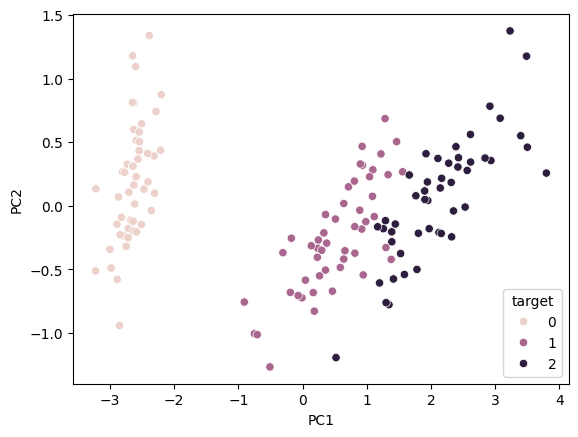

In [57]:
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca)

<Axes: xlabel='PC2', ylabel='PC3'>

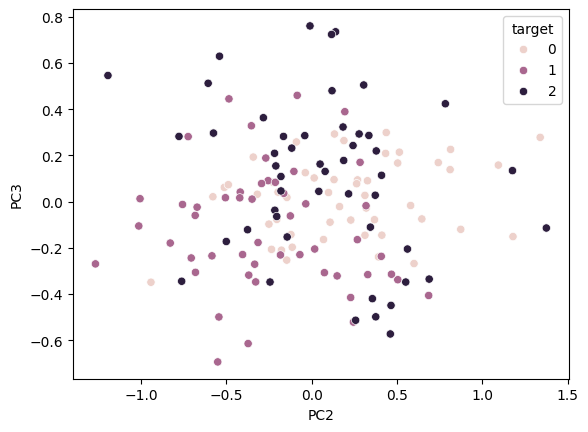

In [58]:
sns.scatterplot(x='PC2', y='PC3', hue='target', data=df_pca)

<Axes: xlabel='PC1', ylabel='PC3'>

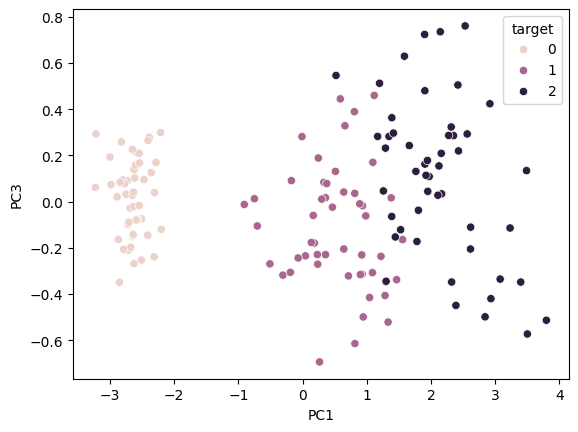

In [59]:
sns.scatterplot(x='PC1', y='PC3', hue='target', data=df_pca)